In [1]:
import pandas as pd
import altair as alt
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("../data/historical-yahoo_com.csv")
df = df[df.position != "G"]
# df = df[df["position"] == "D"]
df = df[["year", "name", "gp", 'goals', 'assists', 'plus_minus', 'powerplay_points', 'shots_on_goal', 'hits']]

In [3]:
df2018 = df[df["year"] == 2018]
df2019 = df[df["year"] == 2019]

In [15]:
target = "goals"

def corrplot(target):
    d18 = df2018[["name", "gp", target]].copy()
    d19 = df2019[["name", "gp", target]].copy()

    d18[target] = d18[target] / d18["gp"]
    d19[target] = d19[target] / d19["gp"]

    both = pd.merge(
        d18[["name", target]], 
        d19[["name", target]], 
        how="inner", 
        on=["name"], 
        suffixes=("_2018", "_2019")
    )
    
    vmin = both[f"{target}_2018"].min()
    vmax = both[f"{target}_2018"].max()
    corr = round(both.corr().iloc[0][1], 2)

    plt.scatter(both[f"{target}_2018"], both[f"{target}_2019"])
    plt.plot([vmin, vmax], [vmin, vmax], c="r")
    plt.title(f"{target}, {corr}")
    plt.xlabel("2018")
    plt.ylabel("2019");

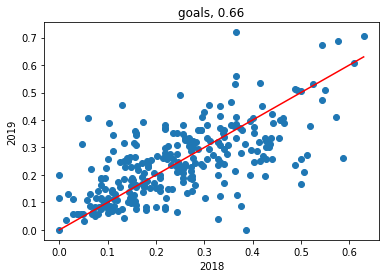

In [5]:
corrplot("goals")

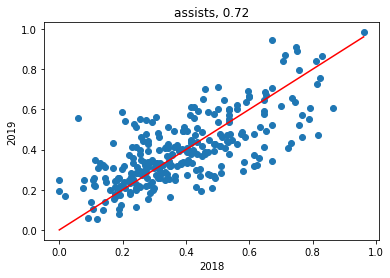

In [6]:
corrplot("assists")

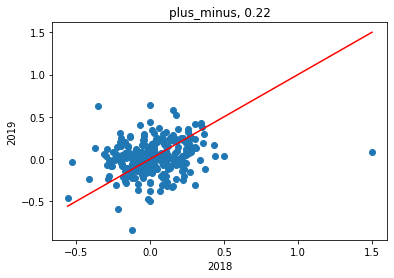

In [7]:
corrplot("plus_minus")

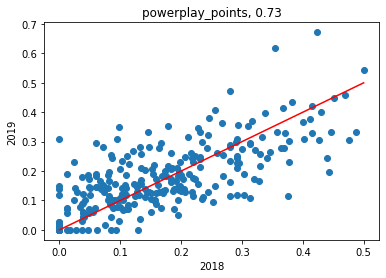

In [8]:
corrplot('powerplay_points')

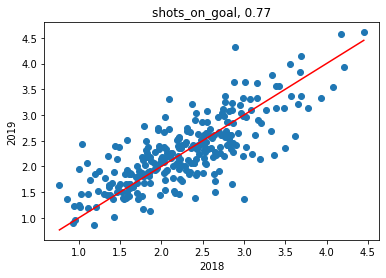

In [9]:
corrplot('shots_on_goal')

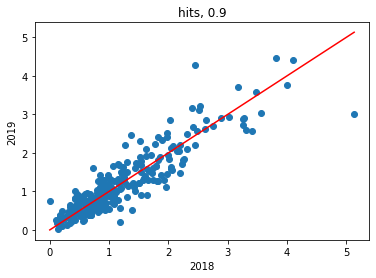

In [10]:
corrplot('hits')

### Goalies

In [23]:
df = pd.read_csv("../data/historical-yahoo_com.csv")
df = df[df.position == "G"]
CATEGORIES = ['wins', 'saves', 'save_percentage', 'goals_against_average', 'shutouts']
df = df[["year", "name", "gp"] + CATEGORIES]
df = df[df["gp"] > 10]
df2018 = df[df["year"] == 2018]
df2019 = df[df["year"] == 2019]

In [24]:
def corrplot(target):
    
    d18 = df2018[["name", "gp", target]].copy()
    d19 = df2019[["name", "gp", target]].copy()

    d18[target] = d18[target] / d18["gp"]
    d19[target] = d19[target] / d19["gp"]

    both = pd.merge(
        d18[["name", target]], 
        d19[["name", target]], 
        how="inner", 
        on=["name"], 
        suffixes=("_2018", "_2019")
    )
    
    vmin = both[f"{target}_2018"].min()
    vmax = both[f"{target}_2018"].max()
    corr = round(both.corr().iloc[0][1], 2)

    plt.scatter(both[f"{target}_2018"], both[f"{target}_2019"])
    plt.plot([vmin, vmax], [vmin, vmax], c="r")
    plt.title(f"{target}, {corr}")
    plt.xlabel("2018")
    plt.ylabel("2019");

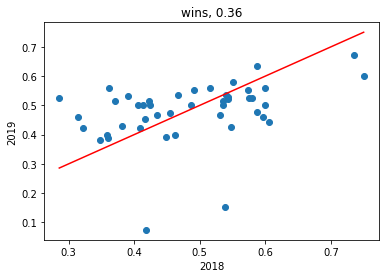

In [25]:
corrplot("wins")

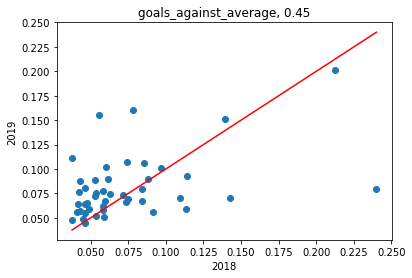

In [26]:
corrplot("goals_against_average")

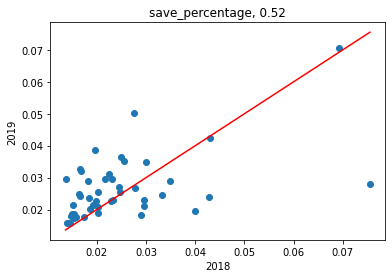

In [27]:
corrplot("save_percentage")

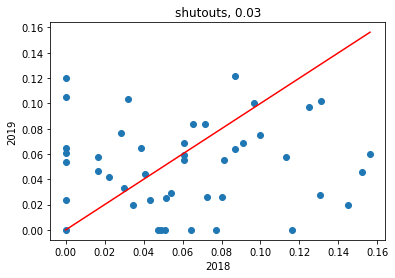

In [28]:
corrplot("shutouts")